In [ ]:
# Install Roboflow Inference SDK
!pip install inference-sdk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.13
    Uninstalling aiohttp-3.11.13:
      Successfully uninstalled aiohttp-3.11.13


In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key="YOUR_API_KEY")

In [ ]:
model_name = "gemini-2.0-flash" # @param ["gemini-1.5-flash-latest","gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.0-pro-exp-02-05"] {"allow-input":true}

In [ ]:
def extracted_text(path):
  image = PIL.Image.open(path)
  response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["Extract text from the image ", image])

  # print(response.text)
  with open("extracted_text.txt", "w", encoding="utf-8") as file:
      file.write(response.text)
  print("Text extraction completed and saved to extracted_text.txt")
  with open("extracted_text.txt", "r", encoding="utf-8") as file:
      text_content = file.read()
  print(text_content)

In [ ]:
from inference_sdk import InferenceHTTPClient
# Import Required Libraries
import json
from PIL import Image, ImageDraw

# Roboflow API Client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=""  # 🔹 Replace with your Roboflow API key
)

# Image Path (Upload your image or use a local path)
image_path = "/content/Screenshot 2025-01-02 200817.png"  # 🔹 Change this to your image file

# Model ID (Newspaper OCR Dataset)
MODEL_ID = "newspaper-ocr-dataset-pjr4c/2"

# Run inference
result = CLIENT.infer(image_path, model_id=MODEL_ID)

# Print JSON Response
print(json.dumps(result, indent=4))

# Draw Bounding Boxes on Image
def draw_boxes(image_path, predictions):
    img = Image.open(image_path)
    draw = ImageDraw.Draw(img)

    for pred in predictions["predictions"]:
        x, y, w, h = pred["x"], pred["y"], pred["width"], pred["height"]
        label = pred["class"]

        x1, y1 = int(x - w / 2), int(y - h / 2)
        x2, y2 = int(x + w / 2), int(y + h / 2)

        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        draw.text((x1, y1 - 10), label, fill="red")

    return img

# Draw bounding boxes if predictions exist
if "predictions" in result and len(result["predictions"]) > 0:
    draw_boxes(image_path, result)
else:
    print("No objects detected.")


{
    "inference_id": "be359519-69cc-4e29-8cc8-c10a5c032513",
    "time": 0.4046885099996871,
    "image": {
        "width": 517,
        "height": 511
    },
    "predictions": [
        {
            "x": 323.5,
            "y": 134.0,
            "width": 377.0,
            "height": 220.0,
            "confidence": 0.9382636547088623,
            "class": "image",
            "points": [
                {
                    "x": 134.9046875,
                    "y": 24.751562500000002
                },
                {
                    "x": 134.9046875,
                    "y": 244.321875
                },
                {
                    "x": 187.41250000000002,
                    "y": 244.321875
                },
                {
                    "x": 188.2203125,
                    "y": 243.5234375
                },
                {
                    "x": 193.875,
                    "y": 243.5234375
                },
                {
                  

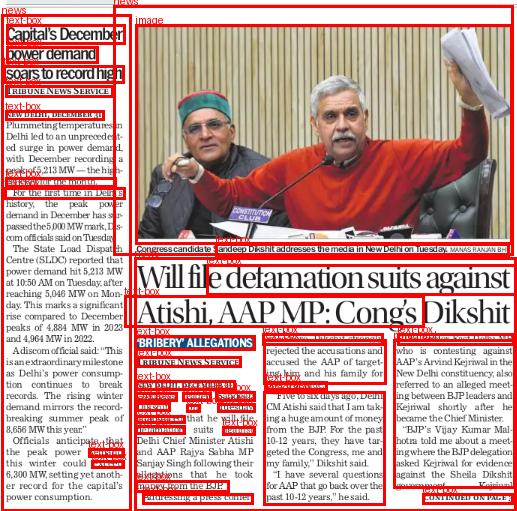

In [ ]:
draw_boxes(image_path, result)

In [ ]:
from inference_sdk import InferenceHTTPClient
import json
import os
from PIL import Image, ImageDraw

# Roboflow API Client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="31L"  # Replace with your Roboflow API key
)

# Image Path (Uploaded Image)
image_path = "/content/Screenshot 2025-01-02 200817.png"  # Update if needed

# Model ID (Newspaper OCR Dataset)
MODEL_ID = "newspaper-ocr-dataset-pjr4c/2"

# Run inference
result = CLIENT.infer(image_path, model_id=MODEL_ID)

# Print JSON Response
print(json.dumps(result, indent=4))

# Create output folders if they don't exist
os.makedirs("cropped_images", exist_ok=True)
os.makedirs("text", exist_ok=True)

# Load original image
img = Image.open(image_path)

# Counters for numbering cropped images
image_counter = 0
text_counter = 0

# Function to crop and save images
def save_cropped_image(img, x, y, w, h, label):
    global image_counter, text_counter

    # Convert center coordinates (x, y) and width, height to bounding box
    x1, y1 = int(x - w / 2), int(y - h / 2)
    x2, y2 = int(x + w / 2), int(y + h / 2)

    # Crop the image
    cropped = img.crop((x1, y1, x2, y2))

    # Save in the appropriate folder
    if label == "image":
        cropped.save(f"cropped_images/{image_counter}.png")
        image_counter += 1
    else:
        cropped.save(f"text/{text_counter}.png")
        text_counter += 1

# Process detections
if "predictions" in result and len(result["predictions"]) > 0:
    for pred in result["predictions"]:
        save_cropped_image(img, pred["x"], pred["y"], pred["width"], pred["height"], pred["class"])
else:
    print("No objects detected.")


{
    "inference_id": "b4c5d1b9-3de0-445a-8957-543a02599c91",
    "time": 0.5131095849997109,
    "image": {
        "width": 517,
        "height": 511
    },
    "predictions": [
        {
            "x": 323.5,
            "y": 134.0,
            "width": 377.0,
            "height": 220.0,
            "confidence": 0.9382636547088623,
            "class": "image",
            "points": [
                {
                    "x": 134.9046875,
                    "y": 24.751562500000002
                },
                {
                    "x": 134.9046875,
                    "y": 244.321875
                },
                {
                    "x": 187.41250000000002,
                    "y": 244.321875
                },
                {
                    "x": 188.2203125,
                    "y": 243.5234375
                },
                {
                    "x": 193.875,
                    "y": 243.5234375
                },
                {
                  

In [ ]:
def azure_text_detection(image_path):
    # Set up the endpoint for OCR
    # Replace with your Azure Cognitive Services subscription key and endpoint
    subscription_key = ""
    endpoint = ""  # e.g., "https://<your-resource-name>.cognitiveservices.azure.com/"
    # Set up the endpoint for OCR
    ocr_url = f"{endpoint}/vision/v3.2/read/analyze"

    # Path to your local image file

    headers = {
        "Ocp-Apim-Subscription-Key": subscription_key,
        "Content-Type": "application/octet-stream"
    }

    # Open the image file in binary mode
    with open(image_path, "rb") as image_file:
        # Send the request to start the OCR process
        response = requests.post(ocr_url, headers=headers, data=image_file)
        response.raise_for_status()

    # Get the operation location (for async OCR)
    operation_url = response.headers["Operation-Location"]

    # Wait for the operation to complete and check the results
    while True:
        result = requests.get(operation_url, headers={"Ocp-Apim-Subscription-Key": subscription_key})
        result = result.json()
        if "status" in result and result["status"] == "succeeded":
            break
        elif "status" in result and result["status"] == "failed":
            raise Exception("OCR failed")
        time.sleep(1)

    # Extract and print the recognized text
    text = ""
    for line in result["analyzeResult"]["readResults"][0]["lines"]:
        text = text + line["text"]
    return text

In [ ]:
azure_text_detection("/content/text/24.png")

'Capital\'s Decemberpower demandsoars to record highTRIBUNE NEWS SERVICENEW DELHI, DECEMBER 31Plummeting temperatures inDelhi led to an unprecedent-ed surge in power demand,with December recording apeak of 5,213 MW - the high-est -ever for the month.For the first time in Delhi\'shistory, the peak powerdemand in December has sur-passed the5,000 MW mark, Dis-com officials said on Tuesday.The State Load DispatchCentre (SLDC) reported thatpower demand hit 5,213 MWat 10:50 AM on Tuesday, afterreaching 5,046 MW on Mon-day. This marks a significantrise compared to Decemberpeaks of 4,884 MW in 2023and 4,964 MW in 2022.Adiscom official said: "Thisis an extraordinary milestoneas Delhi\'s power consump-tion continues to breakrecords. The rising winterdemand mirrors the record-breaking summer peak of8,656 MW this year."Officials anticipate thatthe peak power demandthis winter could exceed8,300 MW, setting yet anoth-er record for the capital\'spower consumption.'

In [ ]:
import os
import requests
import time

# Azure OCR Credentials
subscription_key = ""
endpoint = "/"

ocr_url = f"{endpoint}/vision/v3.2/read/analyze"

# Folder containing text images
text_folder = "text/"
output_text_file = "output_text.txt"

# Headers for the OCR request
headers = {
    "Ocp-Apim-Subscription-Key": subscription_key,
    "Content-Type": "application/octet-stream"
}

# Initialize an empty string to store extracted text
extracted_text = ""

# Process each image in the text folder
for filename in sorted(os.listdir(text_folder)):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(text_folder, filename)
        print(f"Processing {image_path}...")
        extracted_text +=azure_text_detection(image_path)

# Save extracted text to a file
with open(output_text_file, "w", encoding="utf-8") as file:
    file.write(extracted_text)

print(f"Text extraction completed. Saved to {output_text_file}.")


Processing text/0.png...
Processing text/19.png...
Processing text/24.png...
Processing text/4.png...
Processing text/5.png...
Text extraction completed. Saved to output_text.txt.
